In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
def load_data():
    data = pd.read_csv('Hasil_Test/Analisis_LSTM.csv')
    return data

tweet_df = load_data()
tweet_df.head()

,Waktu,Tweets,Sentimen
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...,1
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu,0
2,2022-12-23 02:45:22,tahap tunda milu,0
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda,0
4,2022-12-23 02:43:29,tunda,1


In [3]:
df = pd.DataFrame(tweet_df[['Waktu', 'Tweets', 'Sentimen']])
tweet_df.head()

,Waktu,Tweets,Sentimen
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...,1
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu,0
2,2022-12-23 02:45:22,tahap tunda milu,0
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda,0
4,2022-12-23 02:43:29,tunda,1


In [4]:
tweet_df.head()
Waktu = df['Waktu']
result = []

# pengurangan tahun dan jam pada data waktu #
if len(df['Waktu'][0]) != 5:
    for tgl in range(len(Waktu)):
        Waktu[tgl] = Waktu[tgl][5:10]

# waktu
df.head()
tanggal_fix = []


for i in Waktu:
    if i not in tanggal_fix:
        tanggal_fix.append(i)

jumlah_polarity = []
count = []
mines = []
plus = []

for i in range(len(tanggal_fix)):
    jumlah_polarity.append(0)
    count.append(0)
    mines.append(0)
    plus.append(0)

print(tanggal_fix)
for i in range(len(Waktu)):
    for j in range(len(tanggal_fix)):
        if df['Waktu'][i] == tanggal_fix[j]:
            jumlah_polarity[j] += df["Sentimen"][i]
            count[j] += 1
            if df['Sentimen'][i] == 1:
                plus[j] += 1
            else:
                mines[j] += 1
            continue


print(plus, mines)
avg = []

for i in range(len(tanggal_fix)):
    avg.append(round((plus[i]-mines[i])/count[i], 2))


# print(tot)


<ipython-input-4-83bcec243ac5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Waktu[tgl] = Waktu[tgl][5:10]


['12-23', '12-22', '12-21', '12-20', '12-19', '12-18', '12-17', '12-16', '12-15', '12-14', '12-13']
[8, 19, 25, 35, 25, 21, 19, 26, 46, 116, 4] [10, 28, 14, 6, 33, 38, 25, 18, 33, 97, 4]


In [5]:
import csv
from itertools import zip_longest
d = [tanggal_fix, jumlah_polarity, plus, mines, count, avg]
export_data = zip_longest(*d, fillvalue='')
with open('dataperhari.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(("tanggal", "jumlah sentimen", "positif", "negatif", "jumlah data", "rata_rata"))
    wr.writerows(export_data)
myfile.close()

In [6]:
# mengurutkan data
def load_data(datas):
    data = pd.read_csv(datas)
    return data

df2 = load_data('dataperhari.csv')
df2sorted = df2.sort_values(by=["tanggal"], ascending=True)
df2sorted

,tanggal,jumlah sentimen,positif,negatif,jumlah data,rata_rata
10,12-13,4,4,4,8,0.00
9,12-14,116,116,97,213,0.09
8,12-15,46,46,33,79,0.16
7,12-16,26,26,18,44,0.18
6,12-17,19,19,25,44,-0.14
5,12-18,21,21,38,59,-0.29
4,12-19,25,25,33,58,-0.14
3,12-20,35,35,6,41,0.71
2,12-21,25,25,14,39,0.28
1,12-22,19,19,28,47,-0.19


In [7]:
print(df2['negatif'].tolist())

[10, 28, 14, 6, 33, 38, 25, 18, 33, 97, 4]


<Figure size 3600x2400 with 0 Axes>

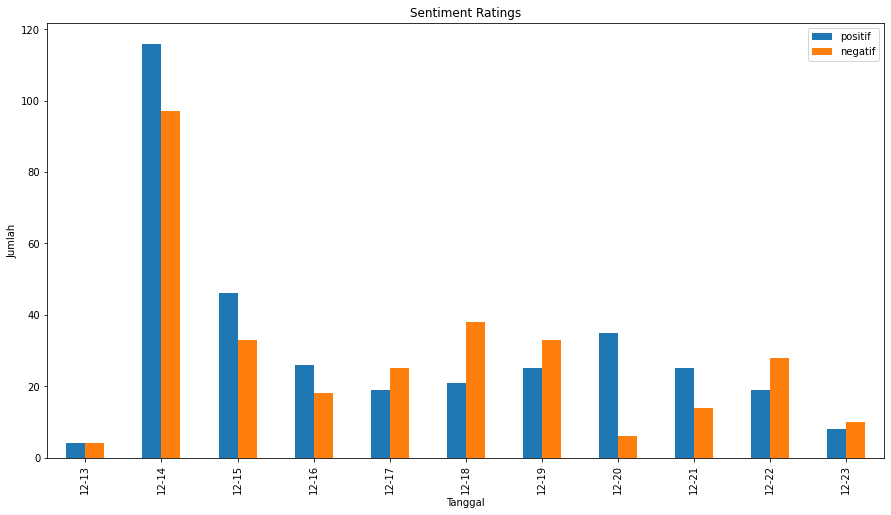

In [8]:
plt.figure(dpi=600)
plotdata = pd.DataFrame({
    "positif": df2sorted['positif'].tolist(),
    "negatif": df2sorted['negatif'].tolist()},
    index=df2sorted['tanggal']
)
plotdata.plot(kind="bar", figsize=(15, 8))

plt.title("Sentiment Ratings")

plt.xlabel("Tanggal")

plt.ylabel("Jumlah")
plt.savefig("gambar/diagram_sentimen_lstm.png")
# plt.bar(bar_coords, date)
# plt.xticks(bar_coords, fix)
plt.show()

In [9]:
tweet_df.head()

,Waktu,Tweets,Sentimen
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...,1
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu,0
2,2022-12-23 02:45:22,tahap tunda milu,0
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda,0
4,2022-12-23 02:43:29,tunda,1


In [10]:
tweet_df['Sentimen'].value_counts()

1    344
0    306
Name: Sentimen, dtype: int64

In [11]:
def polarity_encode(x):
    if(x == 1):
        return 'Positif'
    if(x == 0):
        return 'Negatif'
tweet_df.Sentimen = tweet_df.Sentimen.apply(polarity_encode)
#tweet_df.head()

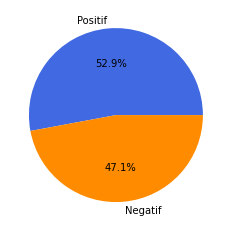

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (4, 4))
sizes = [count for count in tweet_df['Sentimen'].value_counts()]
labels = list(tweet_df['Sentimen'].value_counts().index)
colors = ['royalblue', 'darkorange']
explode = (0, 0)
ax.pie(x = sizes, labels = labels, colors = colors, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
plt.show()

In [13]:
tweet_df['Sentimen'].value_counts()

Positif    344
Negatif    306
Name: Sentimen, dtype: int64